## Практические задания к уроку 5
### Тема “Элементы теории вероятностей”

#### 1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import itertools

from math import factorial as fact

In [2]:
n=7
def roulette():
    for i in range(n):
        print(f"Вращение {i+1}: {random.randint(0, 36)}")
roulette()

Вращение 1: 4
Вращение 2: 6
Вращение 3: 12
Вращение 4: 7
Вращение 5: 34
Вращение 6: 1
Вращение 7: 6


#### 2.1. Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

Проверим теорему умножения вероятностей на примере подбрасывания монетки.


Вероятность выпадения одной и той же стороны монеты подряд равна P(AB) = P(A) * P(B) = 0.5 * 0.5 = 0.25

In [3]:
def flip():
    x = np.random.uniform(0, 10)
    if x < 5:
        return 1
    else:
        return 0

In [4]:
flip_num = 100000 # количество подбрасываний
count = 0

for i in range(flip_num):
    coin1 = flip()
    coin2 = flip()
    if coin1 == 1 and coin2 == 1:
        count += 1

print(f'Расчетная вероятность: 0.25 ')
print(f'Фактическая вероятность {count/flip_num} при количестве подбрасываний {flip_num}')

Расчетная вероятность: 0.25 
Фактическая вероятность 0.24962 при количестве подбрасываний 100000


#### 2.2. Сгенерируйте десять выборок случайных чисел х0, …, х9.и постройте гистограмму распределения случайной суммы +х0+ …+ х 9.

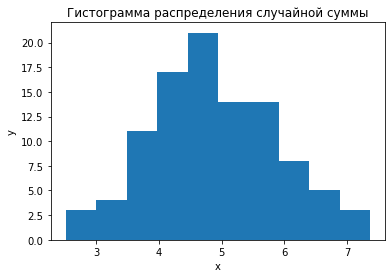

In [5]:
x = np.array([np.random.rand(10) for i in range(100)])
y = list(map(sum, x))
plt.hist(y, bins=10)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Гистограмма распределения случайной суммы")
plt.show()

#### 3.1. Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) и сравните результаты.

In [6]:
def monte(turns, n=2, k=1):
    m = np.random.randint(0, 2, size=(n, turns))
    m_sum = np.isin(np.sum(m, axis=0), k).sum()
    print(f'{k} успешных событий произошло {m_sum} раз из {turns} испытаний')
    print(f'Вероятность {k} успешных событий = {m_sum/turns}')

monte(turns=100000, n=4, k=2)

2 успешных событий произошло 37419 раз из 100000 испытаний
Вероятность 2 успешных событий = 0.37419


Сравним:
$P_{n}(k)=C\binom{k}{n}\frac{1}{2^n}=\frac{4!}{2!(4-2)!}*\frac{1}{2^{4}}=\frac{3}{8}=0.375$

Вывод: значения практически равны

#### 3.2. Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [7]:
monte(turns=100000, n=5, k=3)

3 успешных событий произошло 31247 раз из 100000 испытаний
Вероятность 3 успешных событий = 0.31247


Сравним:
$P_{n}(k)=C\binom{k}{n}\frac{1}{2^n}=\frac{5!}{3!(5-3)!}*\frac{1}{2^{5}}=\frac{10}{32}=0.3125$

Вывод: значения практически равны

#### 4.1. (не обязательно, но желательно) Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

Для наглядности возьмём k=3, n=2 (на уроке было n=2, k=4) и поспотрим возможные варианты.

In [8]:
# без повторений (без 00, 11, 22)
for p in itertools.permutations("012", 2):
    print(''.join(p))

01
02
10
12
20
21


In [9]:
# все возможные вариации
for p in itertools.product("012", repeat=2):
    print(''.join(p))

00
01
02
10
11
12
20
21
22


In [10]:
# сочетания
for i in itertools.combinations("012", 2):
    print(''.join(i))

01
02
12


#### 5.1. (не обязательно) Дополните код расчетом коэффициента корреляции x и y по формуле

0.6779388741487824 0.15889906192766184
0.6779388741487818 0.15889906192766215
Коэффициент корреляции: 0.9168425096044097


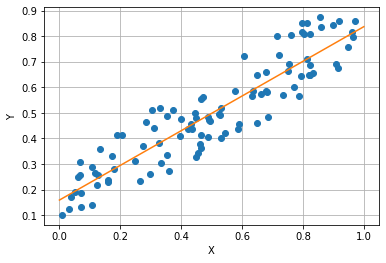

In [11]:
n = 100
r = 0.7

x = np.random.rand(n)
y = r * x + (1 - r)*np.random.rand(n)

plt.plot(x, y, 'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid()

a = (np.sum(x) * np.sum(y) - n*np.sum(x*y)) / (np.sum(x)*np.sum(x) - n*np.sum(x**2))
b = (np.sum(y) - a*np.sum(x)) / n

A = np.vstack([x, np.ones(len(x))]).T
a1, b1 = np.linalg.lstsq(A, y, rcond=-1)[0]

print(a, b)
print(a1, b1)

c = np.corrcoef(x, y)
print(f'Коэффициент корреляции: {c[1,0]}')

plt.plot([0, 1], [b, a+b])
plt.show()

In [12]:
# проверим правильность работы np.corrcoef
xm = np.sum(x) / n
ym = np.sum(y) / n
np.sum( (x - xm)*(y - ym) ) / np.sqrt( np.sum((x - xm)**2) * np.sum((y - ym)**2) )

0.9168425096044099